# Traffic Sign Recognition System

## 1. Data Loading and Exploration
Loading the GTSRB dataset and examining its structure


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')
print("Libraries imported successfully!")


Libraries imported successfully!


# Traffic Sign Recognition System

## 1. Data Loading and Exploration
Loading the GTSRB dataset and examining its structure


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data_dir = 'Data'
train_csv = pd.read_csv(os.path.join(data_dir, 'Train.csv'))
meta_csv = pd.read_csv(os.path.join(data_dir, 'Meta.csv'))

print(f"Training data shape: {train_csv.shape}")
print(f"Number of classes: {len(train_csv['ClassId'].unique())}")
print(f"Class distribution:")
print(train_csv['ClassId'].value_counts().sort_index())


Training data shape: (39209, 8)
Number of classes: 43
Class distribution:
ClassId
0      210
1     2220
2     2250
3     1410
4     1980
5     1860
6      420
7     1440
8     1410
9     1470
10    2010
11    1320
12    2100
13    2160
14     780
15     630
16     420
17    1110
18    1200
19     210
20     360
21     330
22     390
23     510
24     270
25    1500
26     600
27     240
28     540
29     270
30     450
31     780
32     240
33     689
34     420
35    1200
36     390
37     210
38    2070
39     300
40     360
41     240
42     240
Name: count, dtype: int64


## 2. Data Visualization
Visualizing sample traffic signs from different classes


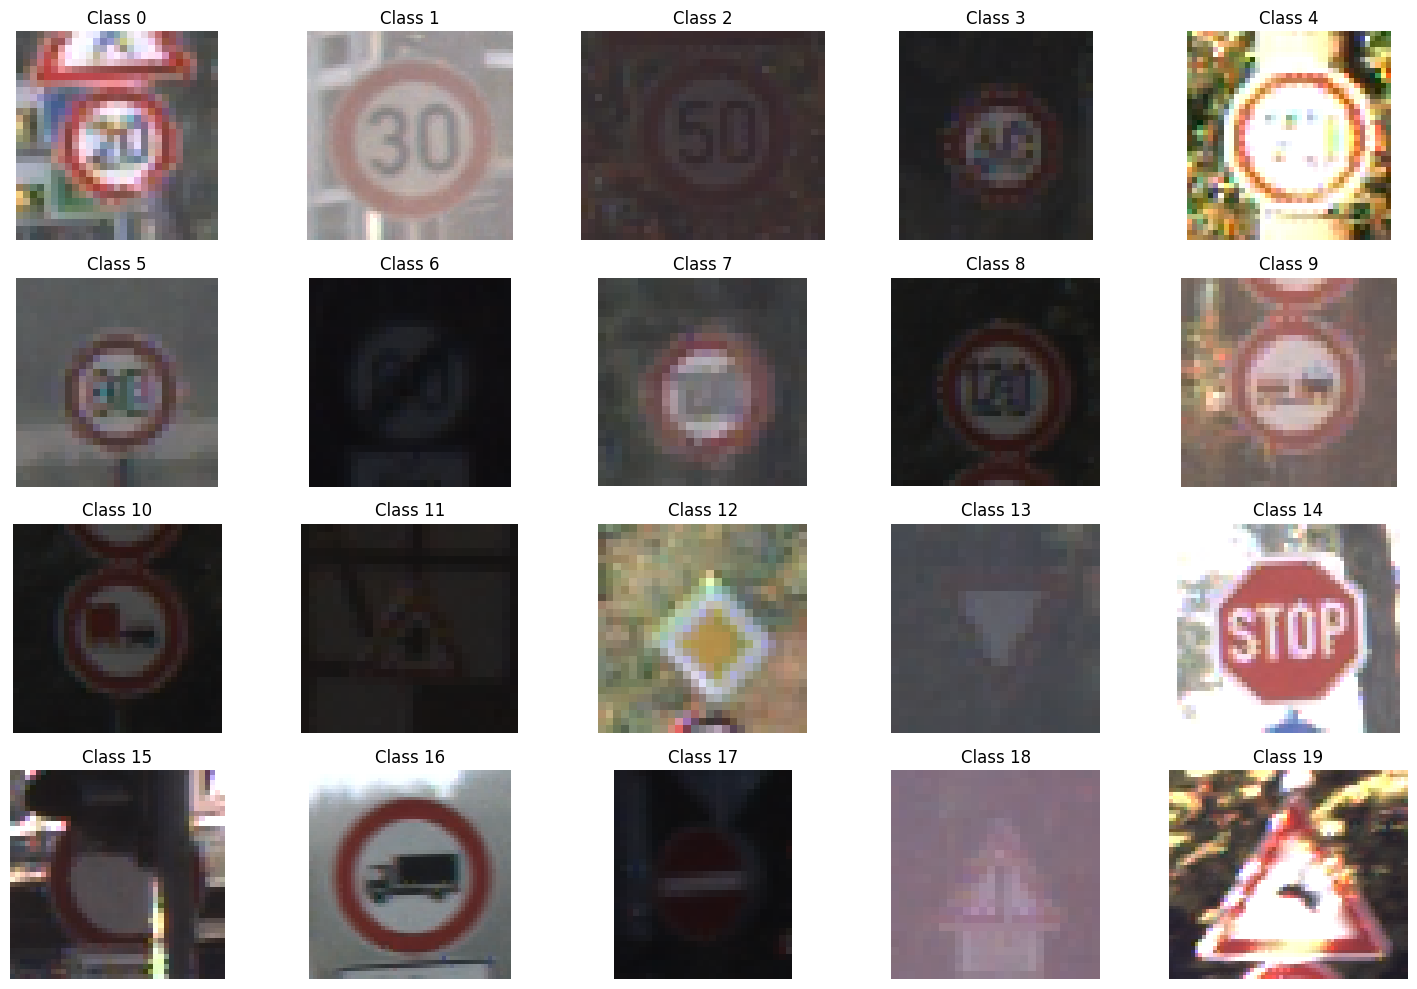

In [ ]:
plt.figure(figsize=(15, 10))
classes = sorted(train_csv['ClassId'].unique())
for i, class_id in enumerate(classes[:20]):
    class_data = train_csv[train_csv['ClassId'] == class_id]
    sample_path = os.path.join(data_dir, class_data.iloc[0]['Path'])
    image = cv2.imread(sample_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.subplot(4, 5, i+1)
    plt.imshow(image)
    plt.title(f'Class {class_id}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## 3. Data Preprocessing
Loading and preprocessing images with resizing and normalization


In [ ]:
IMG_SIZE = 32
NUM_CLASSES = 43

def load_and_preprocess_data(csv_file, data_dir):
    images = []
    labels = []
    
    for idx, row in csv_file.iterrows():
        img_path = os.path.join(data_dir, row['Path'])
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        image = image.astype('float32') / 255.0
        
        images.append(image)
        labels.append(row['ClassId'])
    
    return np.array(images), np.array(labels)

print("Loading and preprocessing training data...")
X_train, y_train = load_and_preprocess_data(train_csv, data_dir)
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")


Loading and preprocessing training data...
Training data shape: (39209, 32, 32, 3)
Training labels shape: (39209,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

y_train_categorical = to_categorical(y_train, NUM_CLASSES)
y_val_categorical = to_categorical(y_val, NUM_CLASSES)

print(f"Training set: {X_train.shape}, {y_train_categorical.shape}")
print(f"Validation set: {X_val.shape}, {y_val_categorical.shape}")


Training set: (25093, 32, 32, 3), (25093, 43)
Validation set: (6274, 32, 32, 3), (6274, 43)


## 4. CNN Model Architecture
Building a Convolutional Neural Network for traffic sign classification


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 43)                  │          22,059 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 754,763 (2.88 MB)

 Trainable params: 753,291 (2.87 MB)

 Non-trainable params: 1,472 (5.75 KB)

## 5. Data Augmentation
Applying data augmentation to improve model generalization


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

datagen.fit(X_train)


## 6. Model Training
Training the CNN model with callbacks for optimal performance


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

EPOCHS = 30
BATCH_SIZE = 64

history = model.fit(
    datagen.flow(X_train, y_train_categorical, batch_size=BATCH_SIZE),
    epochs=EPOCHS,
    validation_data=(X_val, y_val_categorical),
    callbacks=[reduce_lr, early_stop],
    verbose=1
)


Epoch 1/30
 97/393 ━━━━━━━━━━━━━━━━━━━━ 1:17 262ms/step - accuracy: 0.0860 - loss: 4.4161

E:\Python 3.13\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


243/393 ━━━━━━━━━━━━━━━━━━━━ 38s 253ms/step - accuracy: 0.1726 - loss: 3.7064

E:\Python 3.13\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


393/393 ━━━━━━━━━━━━━━━━━━━━ 122s 270ms/step - accuracy: 0.4120 - loss: 2.2384 - val_accuracy: 0.4265 - val_loss: 2.0196 - learning_rate: 0.0010
Epoch 2/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 105s 267ms/step - accuracy: 0.7740 - loss: 0.7054 - val_accuracy: 0.9670 - val_loss: 0.1174 - learning_rate: 0.0010
Epoch 3/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 96s 243ms/step - accuracy: 0.8897 - loss: 0.3445 - val_accuracy: 0.9670 - val_loss: 0.1036 - learning_rate: 0.0010
Epoch 4/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 106s 269ms/step - accuracy: 0.9278 - loss: 0.2263 - val_accuracy: 0.9917 - val_loss: 0.0302 - learning_rate: 0.0010
Epoch 5/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 105s 267ms/step - accuracy: 0.9460 - loss: 0.1711 - val_accuracy: 0.9930 - val_loss: 0.0233 - learning_rate: 0.0010
Epoch 6/30
 79/393 ━━━━━━━━━━━━━━━━━━━━ 1:18 250ms/step - accuracy: 0.9578 - loss: 0.1238

E:\Python 3.13\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


393/393 ━━━━━━━━━━━━━━━━━━━━ 103s 261ms/step - accuracy: 0.9588 - loss: 0.1279 - val_accuracy: 0.9735 - val_loss: 0.0857 - learning_rate: 0.0010
Epoch 7/30
230/393 ━━━━━━━━━━━━━━━━━━━━ 40s 247ms/step - accuracy: 0.9581 - loss: 0.1317

E:\Python 3.13\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


393/393 ━━━━━━━━━━━━━━━━━━━━ 102s 259ms/step - accuracy: 0.9654 - loss: 0.1123 - val_accuracy: 0.9920 - val_loss: 0.0220 - learning_rate: 0.0010
Epoch 8/30
236/393 ━━━━━━━━━━━━━━━━━━━━ 37s 238ms/step - accuracy: 0.9709 - loss: 0.1038

E:\Python 3.13\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


393/393 ━━━━━━━━━━━━━━━━━━━━ 99s 252ms/step - accuracy: 0.9712 - loss: 0.0980 - val_accuracy: 0.9914 - val_loss: 0.0274 - learning_rate: 0.0010
Epoch 9/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 149s 270ms/step - accuracy: 0.9708 - loss: 0.0918 - val_accuracy: 0.9909 - val_loss: 0.0301 - learning_rate: 0.0010
Epoch 10/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 101s 256ms/step - accuracy: 0.9748 - loss: 0.0819 - val_accuracy: 0.9970 - val_loss: 0.0100 - learning_rate: 0.0010
Epoch 11/30
 73/393 ━━━━━━━━━━━━━━━━━━━━ 1:20 253ms/step - accuracy: 0.9775 - loss: 0.0672

E:\Python 3.13\Lib\site-packages\keras\src\legacy\preprocessing\image.py:1880: DeprecationWarning: Please import `affine_transform` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  scipy.ndimage.interpolation.affine_transform(


393/393 ━━━━━━━━━━━━━━━━━━━━ 106s 269ms/step - accuracy: 0.9771 - loss: 0.0703 - val_accuracy: 0.9944 - val_loss: 0.0161 - learning_rate: 0.0010
Epoch 12/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 105s 266ms/step - accuracy: 0.9717 - loss: 0.0935 - val_accuracy: 0.9967 - val_loss: 0.0115 - learning_rate: 0.0010
Epoch 13/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 102s 259ms/step - accuracy: 0.9732 - loss: 0.0855 - val_accuracy: 0.9976 - val_loss: 0.0078 - learning_rate: 0.0010
Epoch 14/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 55s 140ms/step - accuracy: 0.9810 - loss: 0.0574 - val_accuracy: 0.9967 - val_loss: 0.0120 - learning_rate: 0.0010
Epoch 15/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 49s 125ms/step - accuracy: 0.9806 - loss: 0.0642 - val_accuracy: 0.9976 - val_loss: 0.0084 - learning_rate: 0.0010
Epoch 16/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9817 - loss: 0.0604
Epoch 16: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
393/393 ━━━━━━━━━━━━━━━━━━━━ 51s 129ms/step - accuracy: 0.9821

## 7. Training Visualization
Plotting training and validation accuracy and loss curves


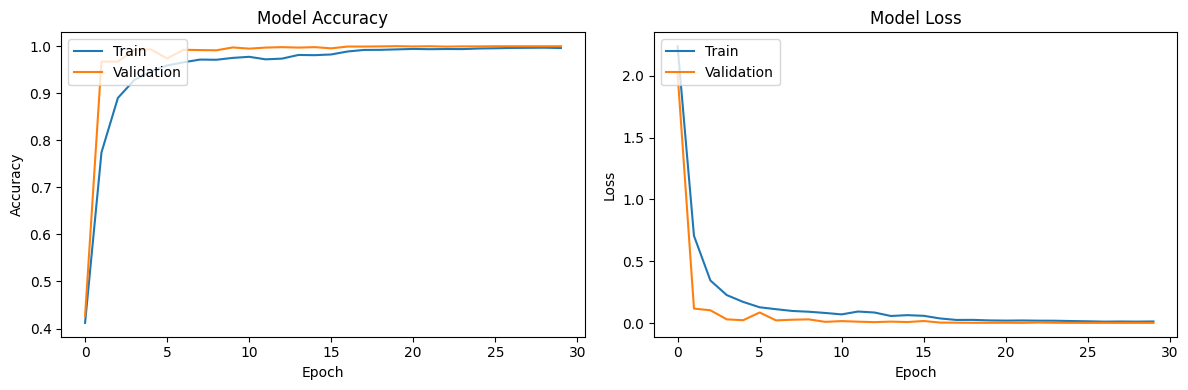

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## 8. Model Evaluation
Evaluating model performance with accuracy and confusion matrix


197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step
Validation Accuracy: 0.9995


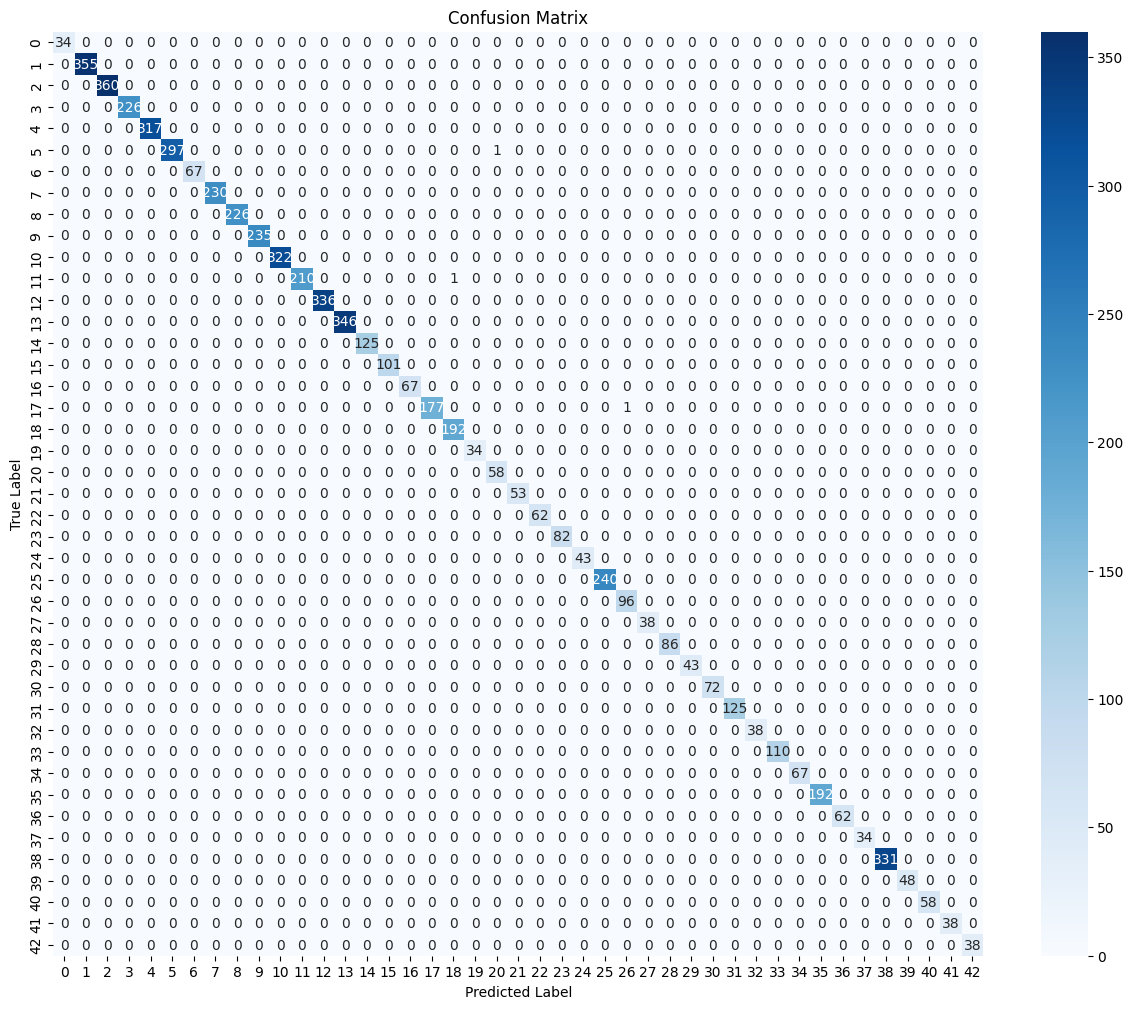


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       355
           2       1.00      1.00      1.00       360
           3       1.00      1.00      1.00       226
           4       1.00      1.00      1.00       317
           5       1.00      1.00      1.00       298
           6       1.00      1.00      1.00        67
           7       1.00      1.00      1.00       230
           8       1.00      1.00      1.00       226
           9       1.00      1.00      1.00       235
          10       1.00      1.00      1.00       322
          11       1.00      1.00      1.00       211
          12       1.00      1.00      1.00       336
          13       1.00      1.00      1.00       346
          14       1.00      1.00      1.00       125
          15       1.00      1.00      1.00       101
          16       1.00      1.00      1.00        67
   

In [14]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_val, y_pred_classes)
print(f"Validation Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:")
print(classification_report(y_val, y_pred_classes))


## 9. Model Saving
Saving the trained model in both H5 and Pickle formats


In [15]:
model.save('traffic_sign_model.h5')
print("Model saved as traffic_sign_model.h5")

with open('traffic_sign_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Model saved as traffic_sign_model.pkl")

class_names = {i: f'Class_{i}' for i in range(NUM_CLASSES)}
with open('class_names.pkl', 'wb') as f:
    pickle.dump(class_names, f)
print("Class names saved as class_names.pkl")


Model saved as traffic_sign_model.h5
Model saved as traffic_sign_model.pkl
Class names saved as class_names.pkl
